In [7]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

In [8]:
df=pd.read_excel("Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [10]:
print(df.columns)

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


In [13]:
df = df.drop(columns=['CustomerID', 'Lat Long', 'Latitude', 'Longitude', 'Churn Reason'], errors='ignore')
df

,Count,Country,State,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,United States,California,Los Angeles,90003,Male,No,No,No,2,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,1,United States,California,Los Angeles,90005,Female,No,No,Yes,2,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,1,United States,California,Los Angeles,90006,Female,No,No,Yes,8,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,1,United States,California,Los Angeles,90010,Female,No,Yes,Yes,28,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,1,United States,California,Los Angeles,90015,Male,No,No,Yes,49,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,United States,California,Landers,92285,Female,No,No,No,72,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306
7039,1,United States,California,Adelanto,92301,Male,No,Yes,Yes,24,...,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140
7040,1,United States,California,Amboy,92304,Female,No,Yes,Yes,72,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560
7041,1,United States,California,Angelus Oaks,92305,Female,No,Yes,Yes,11,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793


In [17]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df = df.dropna()
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19600\7795605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


,Count,Country,State,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,United States,California,Los Angeles,90003,Male,No,No,No,2,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,1,United States,California,Los Angeles,90005,Female,No,No,Yes,2,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,1,United States,California,Los Angeles,90006,Female,No,No,Yes,8,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,1,United States,California,Los Angeles,90010,Female,No,Yes,Yes,28,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,1,United States,California,Los Angeles,90015,Male,No,No,Yes,49,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,United States,California,Landers,92285,Female,No,No,No,72,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306
7039,1,United States,California,Adelanto,92301,Male,No,Yes,Yes,24,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140
7040,1,United States,California,Amboy,92304,Female,No,Yes,Yes,72,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560
7041,1,United States,California,Angelus Oaks,92305,Female,No,Yes,Yes,11,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793


In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

X = df.drop('Churn Value', axis=1)
y = df['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[313 699]
 [146 249]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.31      0.43      1012
           1       0.26      0.63      0.37       395

    accuracy                           0.40      1407
   macro avg       0.47      0.47      0.40      1407
weighted avg       0.56      0.40      0.41      1407



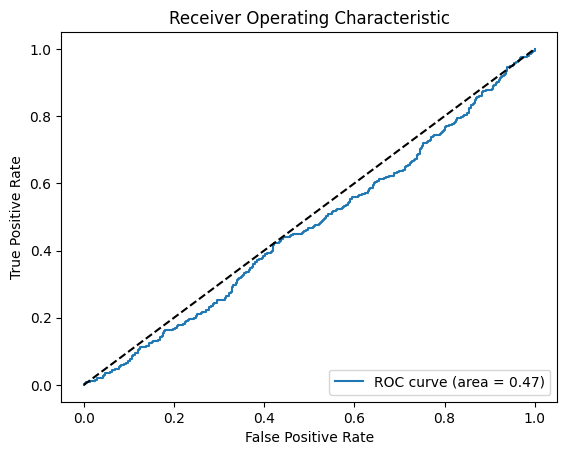

In [27]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()